In [12]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario8_MC-9K_single_drug_model_approach

workdir = "path"

In [13]:
file_list = os.listdir(workdir)

In [14]:
drug_list = []
for x in range(len(file_list)):
    drug_file = file_list[x].split("_")[-1].split(".")[0]
    drug_list.append(drug_file)

17-AAG_//n
train_X shape: (301, 21213)
301 train samples
76 test samples
StartTime : 2019-12-12 18:38:18.448805
EndTime : 2019-12-12 18:38:19.473066
17-AAG’s final rmse value is = 1.610065
17-AAG R-squared value is = -0.229963
AEW541_//n
train_X shape: (302, 21213)
302 train samples
76 test samples
StartTime : 2019-12-12 18:38:19.626656
EndTime : 2019-12-12 18:38:20.069471
AEW541’s final rmse value is = 0.881185
AEW541 R-squared value is = -0.444251
AZD0530_//n
train_X shape: (302, 21213)
302 train samples
76 test samples
StartTime : 2019-12-12 18:38:20.220070
EndTime : 2019-12-12 18:38:20.629972
AZD0530’s final rmse value is = 0.672151
AZD0530 R-squared value is = -0.215164
AZD6244_//n
train_X shape: (301, 21213)
301 train samples
76 test samples
StartTime : 2019-12-12 18:38:20.790543
EndTime : 2019-12-12 18:38:22.079100
AZD6244’s final rmse value is = 1.597271
AZD6244 R-squared value is = 0.040781
Erlotinib_//n
train_X shape: (302, 21213)
302 train samples
76 test samples
StartTime :

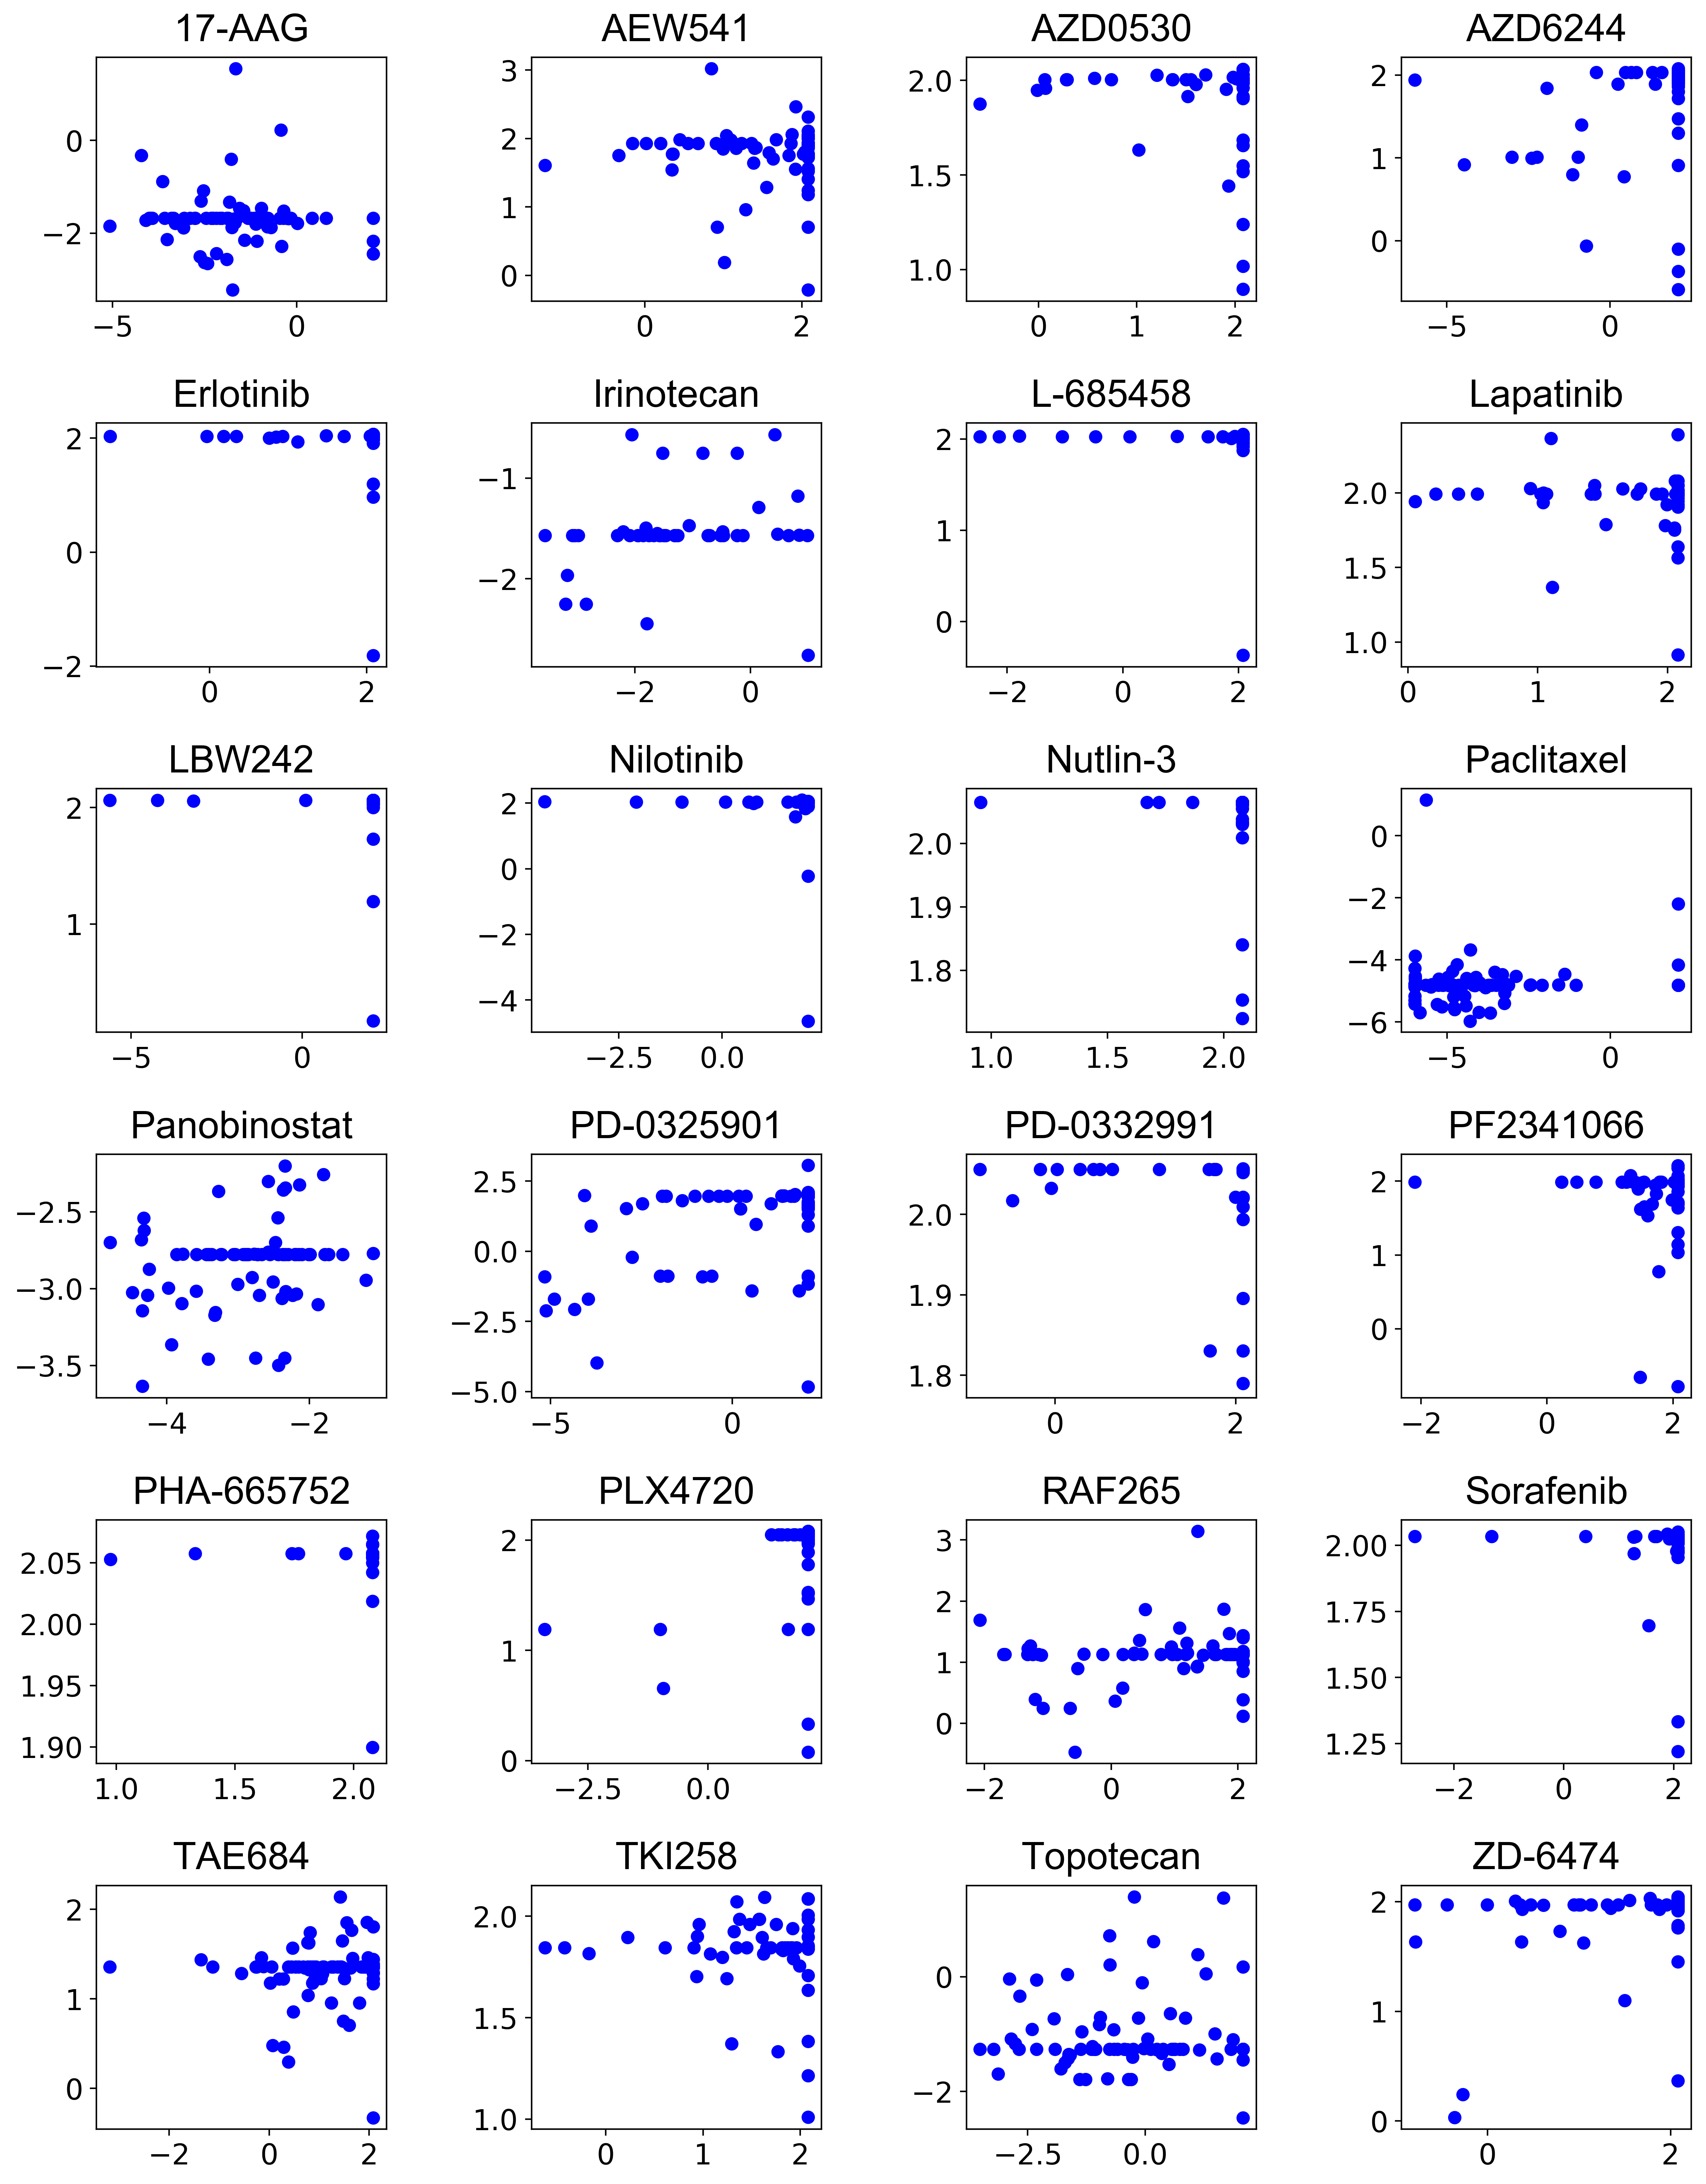

In [15]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for num in range(len(drug_list)):
    dname = drug_list[num]
    print('%s_//n' % dname)
    dataset = np.load(workdir + "//190509_ccle_mut_ic50_aron_%s.npz" % dname) # input file names. please make indified prefix of each file names
    x = dataset['x']
    y = dataset['y']
    train_X, test_X, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=42)
    
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # https://towardsdatascience.com/how-to-perform-lasso-and-lasso-regression-in-python-3b3b75541ad8
    # https://brunch.co.kr/@itschloe1/11
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    lasso_regressor = Lasso(alpha=0.001)
    lasso_regressor.fit(train_X,train_y)

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = lasso_regressor.predict(test_X)
    predicted_value = predicted_classes
        
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//MC-9K//individual_drugs//Lasso//one_drug_one_model"
    c.to_csv(workdir + '//%s_result.csv' % dname)
    
    
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num+1)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "D://ResIC50_finalized_data//Dataset//Small_dataset_CCLE//ccle_each_24_drugs//mut"
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//MC-9K//individual_drugs//Lasso"   

plt.savefig(workdir +'//191212_MC9K_one_drug_one_model_Lasso.png', dpi=400)
workdir = "D://ResIC50_finalized_data//Dataset//Small_dataset_CCLE//ccle_each_24_drugs//mut"

In [16]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [17]:
result

,Drug,RMSE,R2value
0,17-AAG,1.610065,-0.229963
1,AEW541,0.881185,-0.444251
2,AZD0530,0.672151,-0.215164
3,AZD6244,1.597271,0.040781
4,Erlotinib,0.761472,-0.729008
5,Irinotecan,1.231873,-0.044190
6,L-685458,1.042635,-0.162046
7,Lapatinib,0.533164,-0.214248
8,LBW242,1.329092,-0.078520
9,Nilotinib,1.425459,-0.814990


In [18]:
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//MC-9K//individual_drugs//Lasso" 
result.to_csv(workdir +'//191212_MC9K_one_drug_one_model_Lasso_24drugs_metrics.csv')